In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from Utils.fileUtils import getNumber
import os

In [2]:
data = pd.read_csv("ReidentificationTests.csv")

In [22]:
def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x)*100, string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str, probe_places: str, gallery_places: str):
    print(title)
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    print(set(df['Identification_Model'][:]))
    for model in set(df['Identification_Model'][:]):
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df_model.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum['Values'])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión (%)")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAP']])

def plotCMC(df, query, title, probe_places: str = 'ParqueSur', gallery_places: str = 'Ayagaures'):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title, probe_places, gallery_places)

## RetinaFace

RetinaFace
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'VGG-Face', 'OpenFace', 'DeepFace'}
Facenet
           Metric       mAP
155        cosine  0.033327
156     euclidean  0.031083
157  euclidean_l2  0.033327
VGG-Face
           Metric       mAP
84         cosine  0.037191
103     euclidean  0.028927
154  euclidean_l2  0.037191
OpenFace
           Metric       mAP
158        cosine  0.043839
159     euclidean  0.043839
160  euclidean_l2  0.043839
DeepFace
           Metric       mAP
188        cosine  0.049310
189     euclidean  0.047663
190  euclidean_l2  0.049310


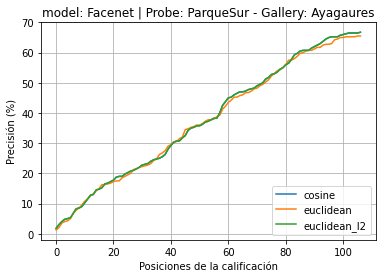

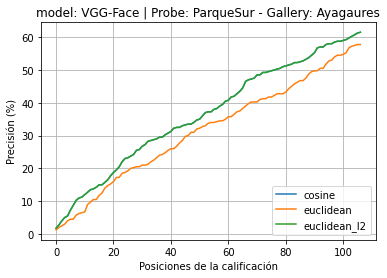

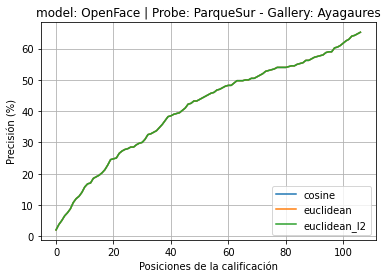

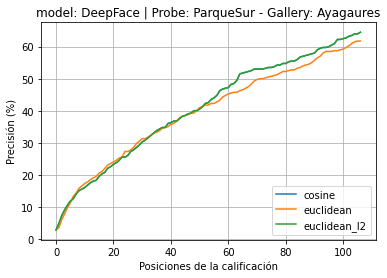

In [23]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

In [24]:
#plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace", 'Arucas','Teror')

RetinaFace + recorte
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'VGG-Face', 'OpenFace', 'DeepFace'}
Facenet
           Metric       mAP
164        cosine  0.059013
165     euclidean  0.058286
166  euclidean_l2  0.059013
VGG-Face
           Metric       mAP
161        cosine  0.086015
162     euclidean  0.064527
163  euclidean_l2  0.086015
OpenFace
           Metric       mAP
167        cosine  0.081808
168     euclidean  0.081808
169  euclidean_l2  0.081808
DeepFace
           Metric       mAP
191        cosine  0.088154
192     euclidean  0.083897
193  euclidean_l2  0.088154


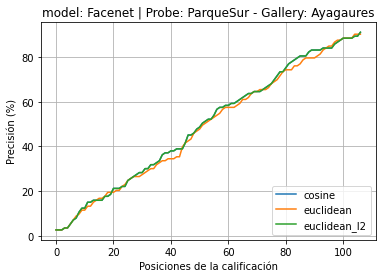

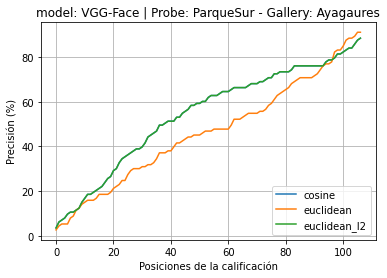

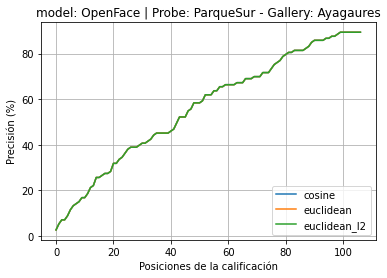

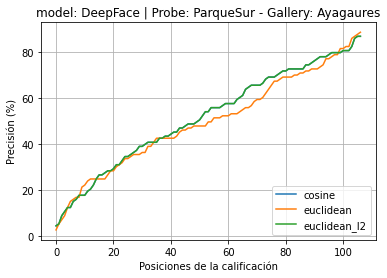

In [25]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

In [26]:
#plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte", 'Arucas','Teror')

## Img2pose

Img2pose
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'VGG-Face', 'OpenFace', 'DeepFace'}
Facenet
           Metric       mAP
173        cosine  0.039417
174     euclidean  0.039359
175  euclidean_l2  0.039417
VGG-Face
           Metric       mAP
170        cosine  0.047229
171     euclidean  0.044147
172  euclidean_l2  0.047229
OpenFace
           Metric       mAP
176        cosine  0.038673
177     euclidean  0.038673
178  euclidean_l2  0.038673
DeepFace
           Metric       mAP
194        cosine  0.051861
195     euclidean  0.052676
196  euclidean_l2  0.051861


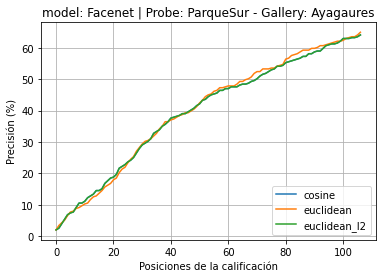

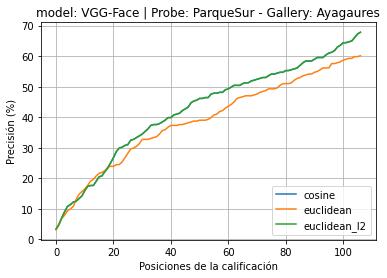

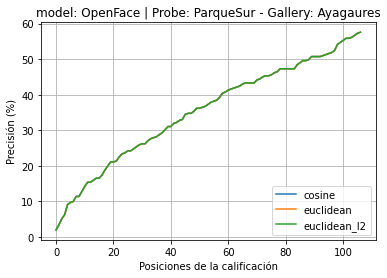

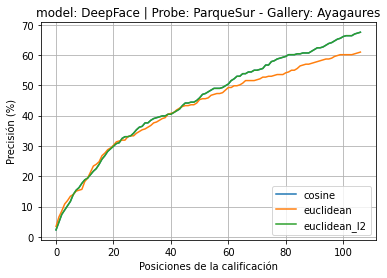

In [27]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

In [28]:
#plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose", 'Arucas','Teror')

Img2pose + recorte de imagenes
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'Facenet', 'VGG-Face', 'OpenFace', 'DeepFace'}
Facenet
           Metric       mAP
182        cosine  0.065235
183     euclidean  0.064770
184  euclidean_l2  0.065235
VGG-Face
           Metric       mAP
179        cosine  0.102124
180     euclidean  0.077489
181  euclidean_l2  0.102124
OpenFace
           Metric       mAP
185        cosine  0.049459
186     euclidean  0.049459
187  euclidean_l2  0.049459
DeepFace
           Metric       mAP
197        cosine  0.088510
198     euclidean  0.088674
199  euclidean_l2  0.088510


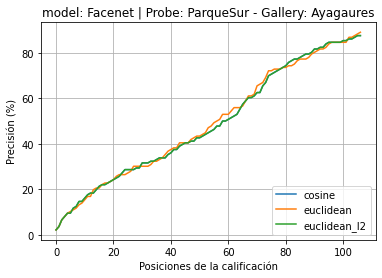

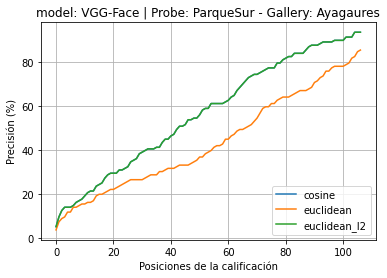

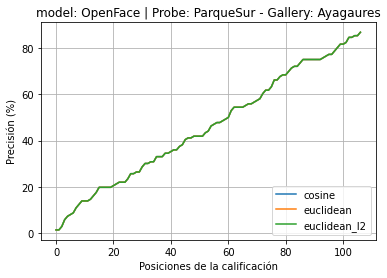

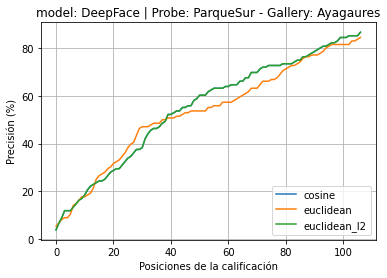

In [29]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

In [30]:
#plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes", 'Arucas','Teror')

## Aligned

### De dia

AlignedReId
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'ResNet50'}
ResNet50
              Metric       mAP
12            cosine  0.009251
30         euclidean  0.483732
290       re-ranking  0.448509
292  pca + euclidean  0.052521


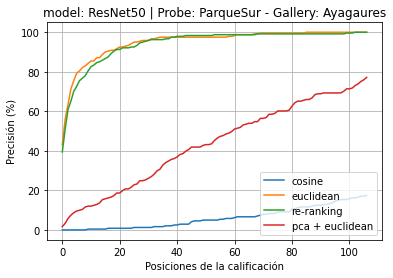

In [31]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId")

AlignedReId + Retinaface
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'VGG-Face'}
VGG-Face
               Metric       mAP
294         euclidean  0.485426
295   pca + euclidean  0.030627
301  tsne + euclidean  0.030518


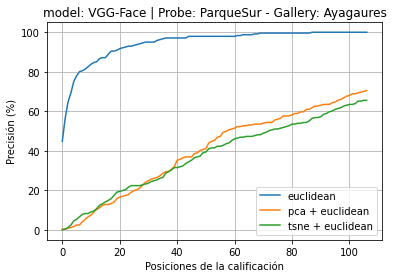

In [32]:
plotCMC(data, 'Face_Model == "AlignedReId + Retinaface"', "AlignedReId + Retinaface")

AlignedReId + img2pose
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'VGG-Face'}
VGG-Face
              Metric       mAP
296        euclidean  0.481834
297  pca + euclidean  0.038033


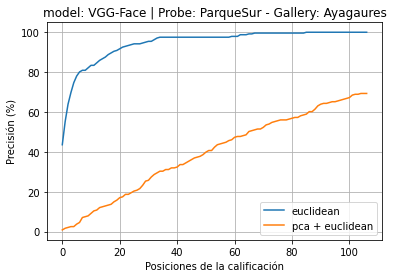

In [33]:
plotCMC(data, 'Face_Model == "AlignedReId + img2pose"', "AlignedReId + img2pose")

### Noche

AlignedReId
[ ### Probe: Arucas - Gallery: Teror  ###]
{'ResNet50'}
ResNet50
              Metric       mAP
8             cosine  0.016733
26         euclidean  0.204037
291       re-ranking  0.194772
293  pca + euclidean  0.042966


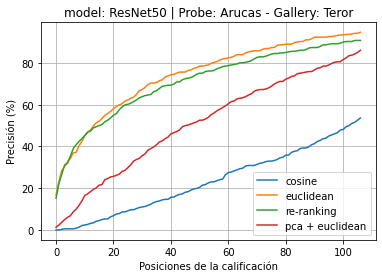

In [34]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId", 'Arucas','Teror')

AlignedReId
[ ### Probe: Arucas - Gallery: Teror  ###]
{'VGG-Face'}
VGG-Face
               Metric       mAP
298         euclidean  0.030518
299   pca + euclidean  0.055092
300  tsne + euclidean  0.030518


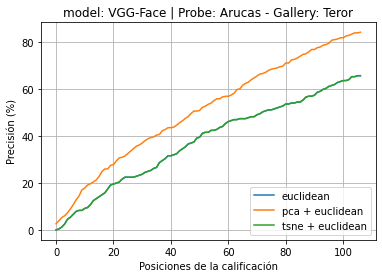

In [35]:
plotCMC(data, 'Face_Model == "AlignedReId + Retinaface"', "AlignedReId", 'Arucas','Teror')

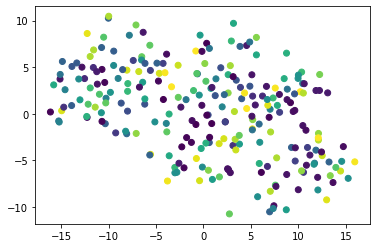

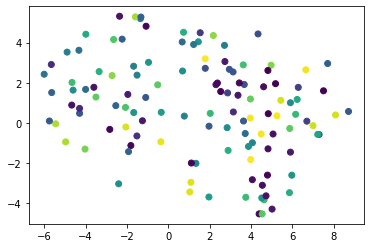

In [3]:
def TSNE_plot(data, classes):
  X_embedded = TSNE(n_components=2).fit_transform(data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c = classes)
  plt.show()

def print_embedding_faces(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)

    embedding = np.array([a[1]  for a in data])
    runners = [getNumber(os.path.basename(a[0])) for a in data]
    TSNE_plot(embedding, runners)

print_embedding_faces('../data/Probe_faces_img2pose_none/Ayagaures/representations_vgg_face.pkl')
print_embedding_faces('../data/Probe_faces_img2pose_dimension/Ayagaures/representations_vgg_face.pkl')

(241, 16384)


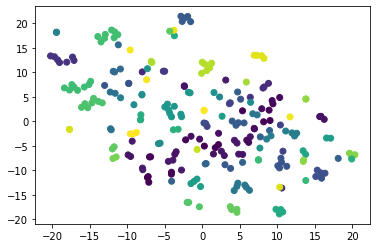

FileNotFoundError: [Errno 2] No such file or directory: '../data/TCG_alignedReId/ParqueSur_retinaface_none_all.pkl'

In [4]:
def print_embedding(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)

    embedding = np.array([a.embedding  for a in data.bodies])
    print(embedding.shape)
    if len(embedding.shape) > 2:
        embedding = embedding.reshape(-1, embedding.shape[1] * embedding.shape[2])
        print(embedding.shape)
    runners = [a.dorsal for a in data.bodies]
    TSNE_plot(embedding, runners)

def apply_pca(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    pca = PCA(n_components=0.95)
    embedding = np.array([a.embedding for a in data.bodies])

    print(embedding[1])
    print(pca.fit_transform(embedding[1]))

def compactFaceBody(fileBody, fileFace):
    with open(fileBody, 'rb') as f, open(fileFace, 'rb') as b:
        bodyCollection = pickle.load(f)
        face = pickle.load(b)

    runners = [getNumber(os.path.basename(a[0])) for a in face]
    dim = len(face[0][1])
    print(bodyCollection.bodies[0].embedding.shape)

    for body in bodyCollection.bodies:
        try:
            index = runners.index(body.dorsal)
            body.embedding = np.append(body.embedding, face[index][1])
        except:
            body.embedding = np.append(body.embedding, np.zeros(dim))

    print(bodyCollection.bodies[0].embedding.shape)

#apply_pca('../data/TCG_alignedReId/ParqueSur.pkl')
print_embedding('../data/TCG_alignedReId/ParqueSur.pkl')
print_embedding('../data/TCG_alignedReId/ParqueSur_retinaface_none_all.pkl')
#print_embedding('../data/TCG_alignedReId/Ayagaures.pkl')

#print_embedding('../data/TCG_alignedReId/ParqueSur_retinaface_none_vgg_face.pkl')
#print_embedding('../data/TCG_alignedReId/Ayagaures_retinaface_none_vgg_face.pkl')


#compactFaceBody('../data/TCG_alignedReId/Ayagaures.pkl',
#                '../data/Probe_faces_retinaface_none/Ayagaures/representations_facenet.pkl')


